In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils

### Example Transient

In [2]:
filename = './data/SN/CSS070320:124616+112555.fits'

In [3]:
data, h = fitsio.read(filename, header=True)
print(h)


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                   38 / width of table in bytes
NAXIS2  =                  121 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    7 / number of fields in each row
TTYPE1  = 'HDU_Ext'            / label for field   1
TFORM1  = '4A'                 / data format of field: ASCII Character
TTYPE2  = 'Sequence'           / label for field   2
TFORM2  = '2A'                 / data format of field: ASCII Character
TTYPE3  = 'Date'               / label for field   3
TFORM3  = '7A'                 / data format of field: ASCII Character
TTYPE4  = 'MJD'                / label for field   4
TFORM4  = '11A'                / data format of field: ASCII Character
TTYPE5  = 'Field_ID'           / label f

In [4]:
CRTS_ID = h['CRTS_ID']
RA = h['RA_(J2000)']
Dec = h['Dec_(J2000)']
Class = h['CLASS']

print(CRTS_ID,RA,Dec, Class)

CSS070320:124616+112555 191.56586 11.43206 SN 2006tf (TSS) SDSS mag 20,7


In [5]:
data = fitsio.read(filename, ext=1)
df = pd.DataFrame(data, columns=['HDU_Ext','Sequence','Date','MJD','Field_ID','Obs_In_Seq','Cutout'], dtype=str)
df

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,06APR02,53828.20301,N12068,0001,3201
1,3,01,06APR02,53827.4378,N12068,0002,3201
2,4,01,06APR02,53827.63761,N12068,0003,3201
3,5,01,06APR02,53827.83083,N12068,0004,3201
4,6,01,06APR08,53833.65812,N12068,0001,3202
...,...,...,...,...,...,...,...
116,118,01,08NOV24,54794.53365,N12068,0003,3202
117,119,01,08NOV24,54794.53979,N12068,0004,3202
118,120,02,07MAR20,54179.50651,FC2004,0003,0526
119,121,02,08MAR13,54538.49554,FC1301,0001,0807


In [6]:
dates = np.unique(df['Date'])
dates

array(['06APR02', '06APR08', '06APR18', '06APR27', '06DEC20', '06JUN19',
       '06MAR03', '06MAR23', '06MAY03', '06MAY21', '07APR15', '07APR24',
       '07DEC04', '07JAN08', '07JAN17', '07JAN29', '07JUN13', '07MAR12',
       '07MAR20', '07MAY13', '07MAY22', '08APR07', '08DEC07', '08DEC22',
       '08FEB14', '08FEB29', '08JAN11', '08JAN31', '08JUN16', '08MAR06',
       '08MAR13', '08MAR29', '08NOV24'], dtype=object)

### Selecting the first date

In [7]:
date = dates[0]
example = df[ (df['Date']==date)]
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,06APR02,53828.20301,N12068,0001,3201
1,3,01,06APR02,53827.4378,N12068,0002,3201
2,4,01,06APR02,53827.63761,N12068,0003,3201
3,5,01,06APR02,53827.83083,N12068,0004,3201


In [8]:
exts = np.array(example['HDU_Ext']).astype(int)
obs = np.array(example['Obs_In_Seq']).astype(int)
MJD = np.array(example['MJD']).astype(float)
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,06APR02,53828.20301,N12068,0001,3201
1,3,01,06APR02,53827.4378,N12068,0002,3201
2,4,01,06APR02,53827.63761,N12068,0003,3201
3,5,01,06APR02,53827.83083,N12068,0004,3201


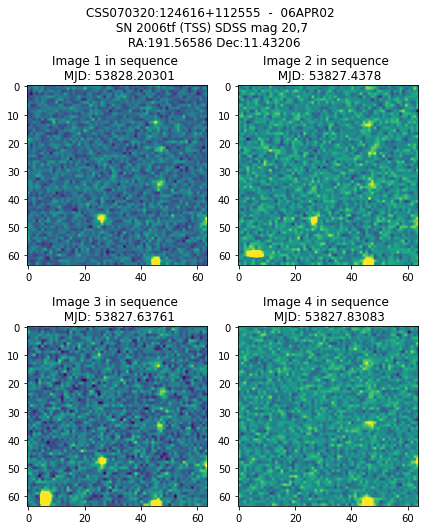

In [9]:
rows = int(len(exts)/2)
fig = plt.figure(figsize=(6,5*rows))
for i, ext in enumerate(exts):
    plt.subplot(rows+1,2,i+1)
    data = fitsio.read(filename, ext=ext)
    zmin, zmax = utils.zscale(data)
    plt.imshow(data, vmin=zmin, vmax=zmax)
    plt.title('Image {} in sequence \n MJD: {}'.format(obs[i], MJD[i]))
plt.suptitle('{}  -  {} \n {} \n RA:{} Dec:{}'.format(CRTS_ID, date,Class,RA,Dec), y=1.05)
plt.tight_layout()
plt.show()

### Example NON-Transient

In [10]:
filename = './data/NON/nonCSS_48.8208:-1.66803.fits'

In [11]:
data, h = fitsio.read(filename, header=True)
print(h)


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                   32 / width of table in bytes
NAXIS2  =                   80 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    5 / number of fields in each row
TTYPE1  = 'HDU_Ext'            / label for field   1
TFORM1  = '4A'                 / data format of field: ASCII Character
TTYPE2  = 'MJD'                / label for field   2
TFORM2  = '11A'                / data format of field: ASCII Character
TTYPE3  = 'DATE'               / label for field   3
TFORM3  = '7A'                 / data format of field: ASCII Character
TTYPE4  = 'Field_ID'           / label for field   4
TFORM4  = '6A'                 / data format of field: ASCII Character
TTYPE5  = 'Cutout'             / label f

In [12]:
CRTS_ID = h['CRTS_ID']
RA = h['RA_(J2000)']
Dec = h['Dec_(J2000)']
Img_Ref = h['IMG_REF']

print(CRTS_ID,RA,Dec, Img_Ref)

CSS071206:031525-014051 48.8207745839323 -1.66802657404463 01_10OCT30_S01018_0001_cutout_2013.fits


In [13]:
data = fitsio.read(filename, ext=1)
df = pd.DataFrame(data, columns=['HDU_Ext','MJD','DATE','Field_ID','Cutout'], dtype=str)
df

,HDU_Ext,MJD,DATE,Field_ID,Cutout
0,2,55069.41632,09AUG26,S01018,2115
1,3,55069.42234,09AUG26,S01018,2114
2,4,55069.42836,09AUG26,S01018,2115
3,5,55069.43447,09AUG26,S01018,2115
4,6,55178.16641,09DEC13,S01018,2114
...,...,...,...,...,...
75,77,55826.49434,11SEP22,S01018,2113
76,78,55826.49850,11SEP22,S01018,2114
77,79,55507.32704,10NOV07,S01018,2113
78,80,55507.33392,10NOV07,S01018,2113


In [14]:
MJD = np.array(df['MJD'])

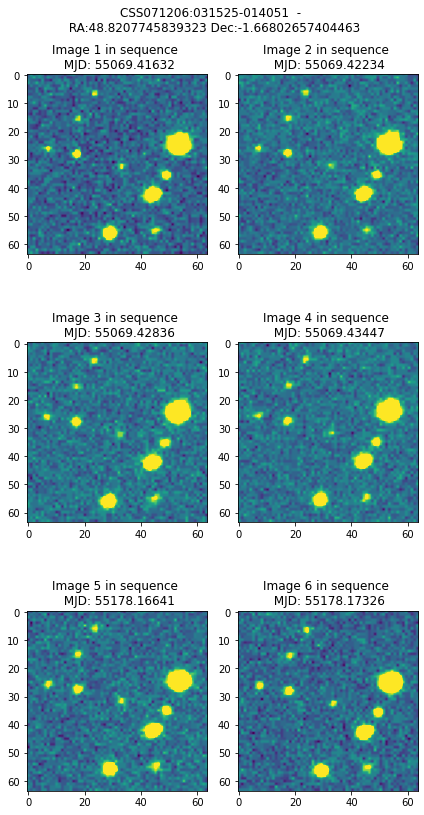

In [15]:
exts = np.array(df['HDU_Ext']).astype(int)[:6]
rows = int(len(exts)/2)
fig = plt.figure(figsize=(6,5*rows))
for i, ext in enumerate(exts):
    plt.subplot(rows+1,2,i+1)
    data = fitsio.read(filename, ext=ext)
    zmin, zmax = utils.zscale(data)
    plt.imshow(data, vmin=zmin, vmax=zmax)
    plt.title('Image {} in sequence \n MJD: {}'.format(i+1, MJD[i]))
plt.suptitle('{}  - \n RA:{} Dec:{}'.format(CRTS_ID, RA,Dec), y=1.01)
plt.tight_layout()
plt.show()